In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"X_train: {X_train.shape}")

X_train: (60000, 28, 28)


In [4]:
X_train, X_test = X_train /255.0, X_test /255.0

In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6925 - accuracy: 0.8242 - val_loss: 0.3232 - val_accuracy: 0.9138
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2976 - accuracy: 0.9162 - val_loss: 0.2525 - val_accuracy: 0.9302
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2403 - accuracy: 0.9319 - val_loss: 0.2154 - val_accuracy: 0.9402
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2075 - accuracy: 0.9404 - val_loss: 0.1928 - val_accuracy: 0.9473
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1841 - accuracy: 0.9466 - val_loss: 0.1758 - val_accuracy: 0.9523
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1659 - accuracy: 0.9524 - val_loss: 0.1635 - val_accuracy: 0.9542
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1513 - accuracy: 0.9567 - val_loss: 0.1532 - val_ac

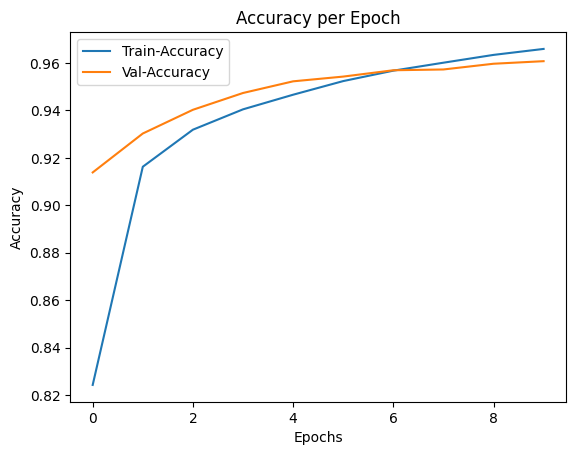

In [8]:
plt.plot(history.history['accuracy'], label="Train-Accuracy")
plt.plot(history.history['val_accuracy'], label="Val-Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

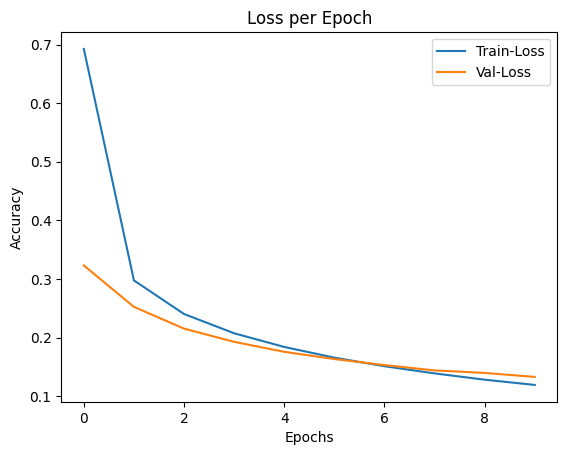

In [9]:
plt.plot(history.history['loss'], label="Train-Loss")
plt.plot(history.history['val_loss'], label="Val-Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

print(f"Classification Report: {classification_report(y_pred_classes, y_true)}")

313/313 [==============================] - 1s 3ms/step
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1007
           1       0.99      0.98      0.98      1141
           2       0.96      0.95      0.96      1046
           3       0.94      0.96      0.95       990
           4       0.96      0.97      0.96       973
           5       0.94      0.97      0.96       865
           6       0.97      0.96      0.96       972
           7       0.95      0.97      0.96      1015
           8       0.96      0.95      0.95       979
           9       0.95      0.95      0.95      1012

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



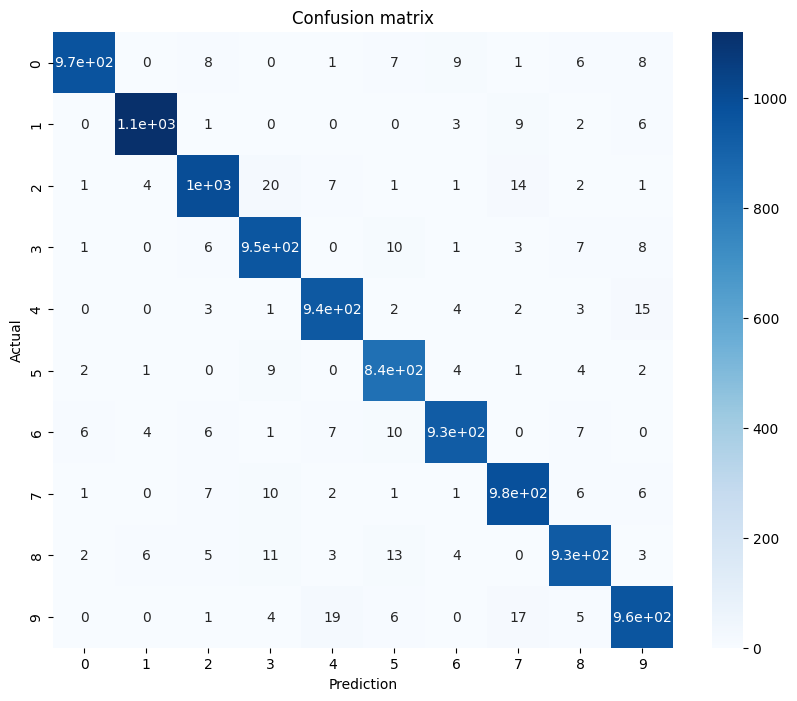

In [17]:
cm = confusion_matrix(y_pred_classes, y_true)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [23]:
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Accuracy of class {i} : {acc:.2f}")

Accuracy of class 0 : 0.96
Accuracy of class 1 : 0.98
Accuracy of class 2 : 0.95
Accuracy of class 3 : 0.96
Accuracy of class 4 : 0.97
Accuracy of class 5 : 0.97
Accuracy of class 6 : 0.96
Accuracy of class 7 : 0.97
Accuracy of class 8 : 0.95
Accuracy of class 9 : 0.95


In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [33]:
y_true = y_test
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


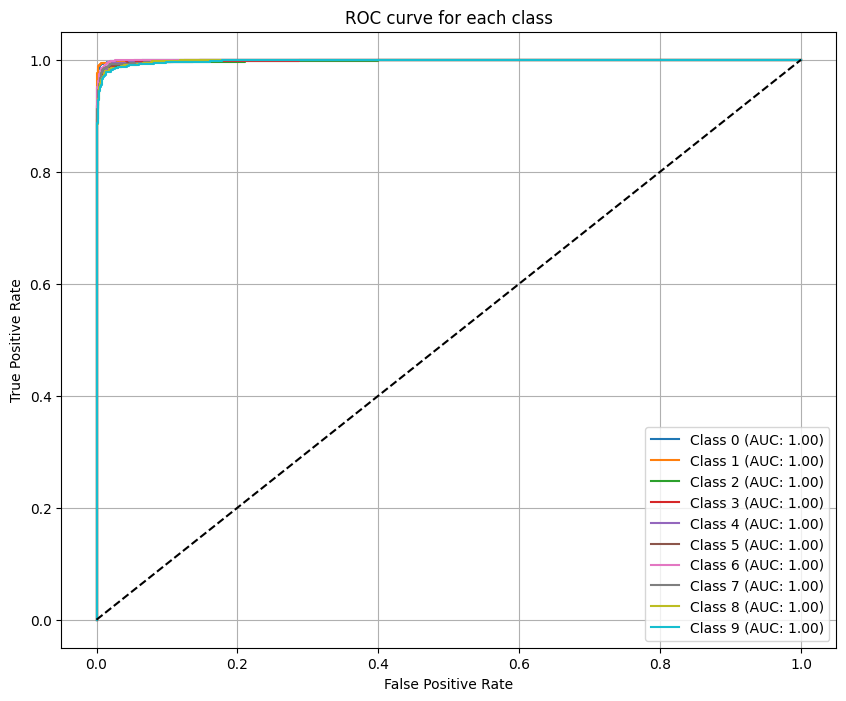

In [34]:
y_true_bin = label_binarize(y_true, classes=range(10))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC: {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for each class")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [35]:
unique, counts = np.unique(y_true, return_counts=True)
print(dict(zip(unique, counts)))

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [36]:
import cv2

In [58]:
def make_prediction(model, img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.CONVERT_BGR2GRAY)
    img = img /255.0
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img)
    y_pred_class = np.argmax(y_pred, axis=1)
    print(f"y_pred: {y_pred}")
    return y_pred_class, img

1/1 [==============================] - 0s 63ms/step
y_pred: [[8.0311456e-06 3.8838674e-21 1.3723189e-07 1.7116099e-06 1.4496382e-17
  6.7326800e-05 3.6598299e-02 9.6332455e-01 1.1889523e-12 1.1079645e-21]]
Prediction: [7]


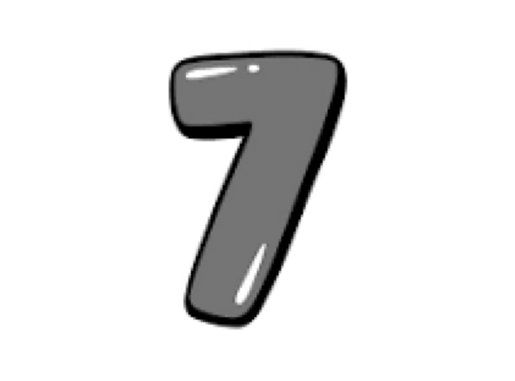

In [66]:
img_path = r"C:\Users\LENOVO\Downloads\digit-7.png"
result, img = make_prediction(model, img_path)
print(f"Prediction: {result}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 79ms/step
y_pred: [[2.1396586e-10 1.7943939e-20 3.9658938e-09 8.5816379e-07 1.3844244e-25
  3.0455189e-07 1.6675969e-08 9.9999881e-01 1.8030432e-16 2.5607712e-26]]
Prediction: [7]


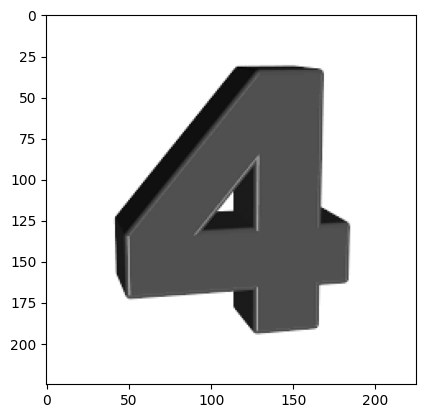

In [69]:
img_path = r"C:\Users\LENOVO\Downloads\digit-4.png"
result, img = make_prediction(model, img_path)
print(f"Prediction: {result}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

1/1 [==============================] - 0s 81ms/step
y_pred: [[2.5977295e-05 4.4288667e-19 7.4692392e-01 7.7896193e-03 6.8942277e-16
  1.5841403e-04 2.4510184e-01 7.6987007e-08 7.5331805e-08 2.7095603e-22]]
Prediction: [2]


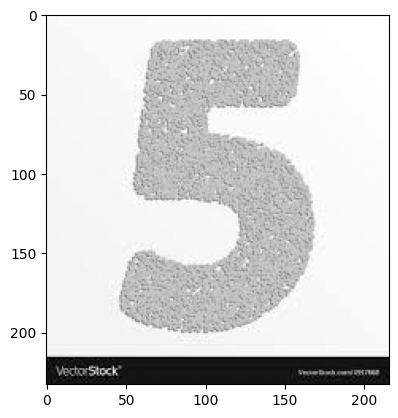

In [70]:
img_path = r"C:\Users\LENOVO\Downloads\digit-5.jpeg"
result, img = make_prediction(model, img_path)
print(f"Prediction: {result}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

1/1 [==============================] - 0s 60ms/step
y_pred: [[1.0608431e-05 2.7173903e-18 2.5419073e-05 2.8768569e-04 3.8301868e-20
  2.3332182e-06 2.0606464e-02 9.7906744e-01 2.8870005e-12 3.1914463e-23]]
Prediction: [7]


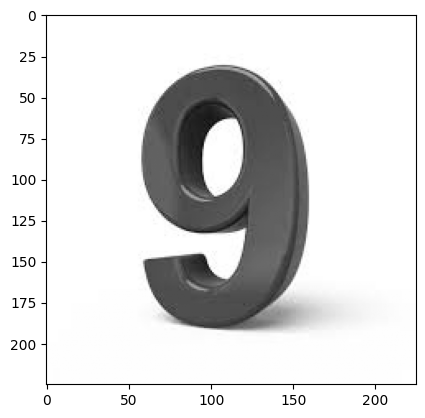

In [67]:
img_path = r"C:\Users\LENOVO\Downloads\digit-9.jpeg"
result, img = make_prediction(model, img_path)
print(f"Prediction: {result}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

1/1 [==============================] - 0s 80ms/step
y_pred: [[5.6686130e-04 7.2731293e-21 6.3095657e-05 1.4896874e-05 2.2581377e-19
  1.1234750e-05 3.9090964e-01 6.0843420e-01 5.1312171e-12 2.0960789e-22]]
Prediction: [7]


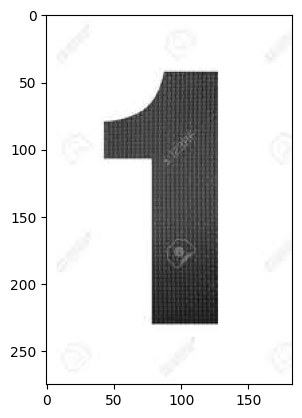

In [68]:
img_path = r"C:\Users\LENOVO\Downloads\digit-11.jpeg"
result, img = make_prediction(model, img_path)
print(f"Prediction: {result}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()